In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv('Only EW1.csv',parse_dates=True)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df.set_index('date').asfreq('D')
#df.set_index('date').asfreq=('D')

In [219]:
df

,warehouse,total_orders
date,,
2021-08-10,EW1,455.0
2021-08-11,EW1,553.0
2021-08-12,EW1,569.0
2021-08-13,EW1,426.0
2021-08-14,EW1,536.0
...,...,...
2021-11-04,EW1,386.0
2021-11-05,EW1,375.0
2021-11-06,EW1,441.0


In [220]:
df[df['total_orders'].isnull()].index.tolist()


[Timestamp('2021-08-18 00:00:00', freq='D')]

In [221]:
mean_value=df['total_orders'].mean()
df=df.fillna(value=mean_value)

<AxesSubplot:xlabel='date'>

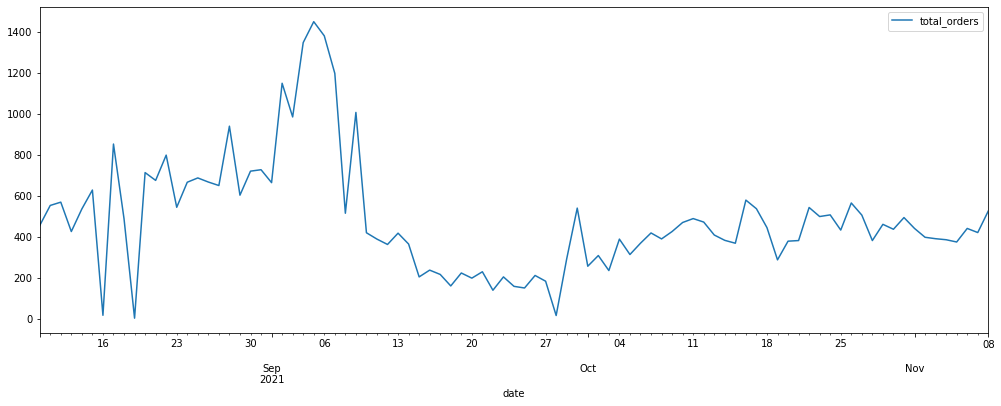

In [222]:
df.plot(figsize=(17,6))

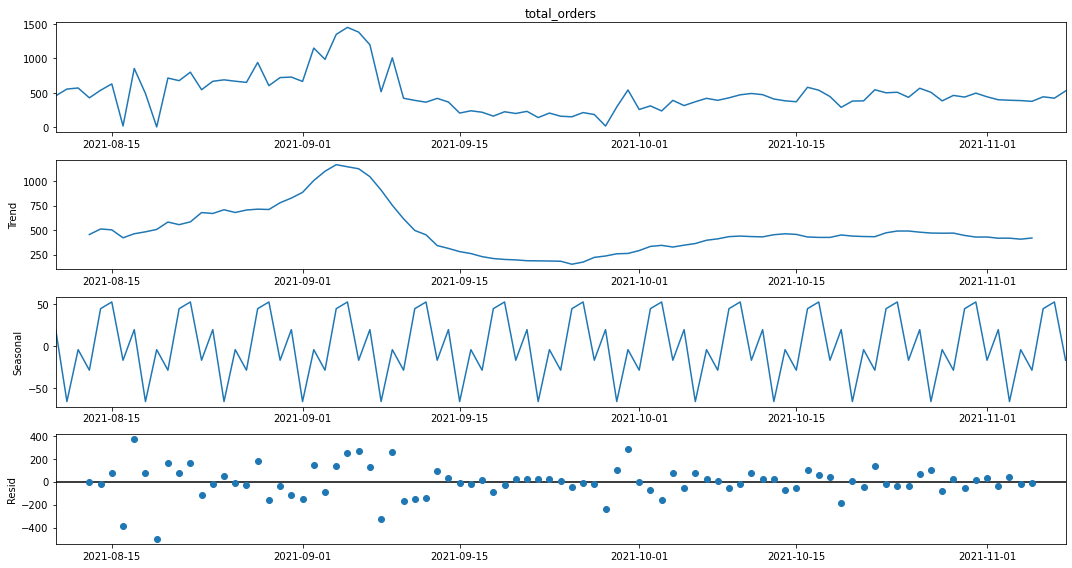

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [15, 8]
results = seasonal_decompose(df['total_orders'])
results.plot();

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [225]:
df.head(),df.tail()

(           warehouse  total_orders
 date                              
 2021-08-10       EW1         455.0
 2021-08-11       EW1         553.0
 2021-08-12       EW1         569.0
 2021-08-13       EW1         426.0
 2021-08-14       EW1         536.0,
            warehouse  total_orders
 date                              
 2021-11-04       EW1         386.0
 2021-11-05       EW1         375.0
 2021-11-06       EW1         441.0
 2021-11-07       EW1         421.0
 2021-11-08       EW1         526.0)

In [226]:
df.drop('warehouse', inplace=True, axis=1)

In [227]:
df.head(),df.tail()

(            total_orders
 date                    
 2021-08-10         455.0
 2021-08-11         553.0
 2021-08-12         569.0
 2021-08-13         426.0
 2021-08-14         536.0,
             total_orders
 date                    
 2021-11-04         386.0
 2021-11-05         375.0
 2021-11-06         441.0
 2021-11-07         421.0
 2021-11-08         526.0)

In [228]:
#divide data into train and test
train_ind = int(len(df)*0.9)
train = df[:train_ind]
test = df[train_ind:]

In [229]:
df.head(),df.tail()

(            total_orders
 date                    
 2021-08-10         455.0
 2021-08-11         553.0
 2021-08-12         569.0
 2021-08-13         426.0
 2021-08-14         536.0,
             total_orders
 date                    
 2021-11-04         386.0
 2021-11-05         375.0
 2021-11-06         441.0
 2021-11-07         421.0
 2021-11-08         526.0)

In [230]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [231]:
scaled_train[:10]

array([[0.31232687],
       [0.38019391],
       [0.39127424],
       [0.29224377],
       [0.36842105],
       [0.43213296],
       [0.00969529],
       [0.58725762],
       [0.33551093],
       [0.        ]])

In [232]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [290]:
# define generator
n_input = int(train_ind*0.12)
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [291]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [292]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [293]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 50)                10400     
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [294]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
72/72 [==============================] - 2s 4ms/step - loss: 0.0519 - mae: 0.1724
Epoch 2/50
72/72 [==============================] - 0s 4ms/step - loss: 0.0300 - mae: 0.1297
Epoch 3/50
72/72 [==============================] - 0s 4ms/step - loss: 0.0267 - mae: 0.1198
Epoch 4/50
72/72 [==============================] - 0s 5ms/step - loss: 0.0294 - mae: 0.1246
Epoch 5/50
72/72 [==============================] - 0s 5ms/step - loss: 0.0275 - mae: 0.1215
Epoch 6/50
72/72 [==============================] - 0s 5ms/step - loss: 0.0254 - mae: 0.1167
Epoch 7/50
72/72 [==============================] - 0s 5ms/step - loss: 0.0249 - mae: 0.1175
Epoch 8/50
72/72 [==============================] - 0s 5ms/step - loss: 0.0240 - mae: 0.1116
Epoch 9/50
72/72 [==============================] - 0s 6ms/step - loss: 0.0237 - mae: 0.1107
Epoch 10/50
72/72 [==============================] - 1s 7ms/step - loss: 0.0235 - mae: 0.1111
Epoch 11/50
72/72 [==============================] - 1s 7ms/step - lo

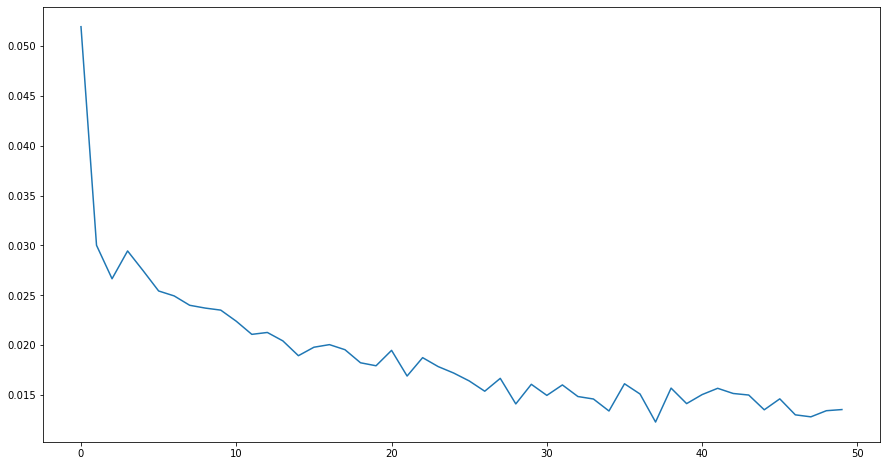

In [295]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [296]:
import tensorflow as tf
tf.keras.metrics.RootMeanSquaredError(
    name='root_mean_squared_error', dtype=None
)

In [297]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [298]:
test_predictions

[array([0.3186103], dtype=float32),
 array([0.3143018], dtype=float32),
 array([0.3123031], dtype=float32),
 array([0.31043378], dtype=float32),
 array([0.30932033], dtype=float32),
 array([0.30752313], dtype=float32),
 array([0.3084165], dtype=float32),
 array([0.3085359], dtype=float32),
 array([0.30684066], dtype=float32),
 array([0.3059806], dtype=float32)]

In [299]:
test.head()

,total_orders,Predictions
date,,
2021-10-30,437.0,409.316725
2021-10-31,494.0,387.441186
2021-11-01,441.0,361.263116
2021-11-02,398.0,334.614786
2021-11-03,391.0,307.634553


In [300]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[464.07328844],
       [457.85178304],
       [454.9656707 ],
       [452.26637137],
       [450.65855742],
       [448.0634017 ],
       [449.35340548],
       [449.52584493],
       [447.07791042],
       [445.83597624]])

In [301]:
predictions=[]
for i in true_predictions:
    predictions.append(i[0])

predictions

[464.0732884407043,
 457.8517830371856,
 454.96567070484156,
 452.2663713693618,
 450.6585574150085,
 448.0634016990661,
 449.3534054756164,
 449.5258449316024,
 447.07791042327875,
 445.83597624301905]

In [302]:
test['Predictions'] = predictions

C:\Users\shahz\AppData\Local\Temp/ipykernel_2340/897085543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


<AxesSubplot:xlabel='date'>

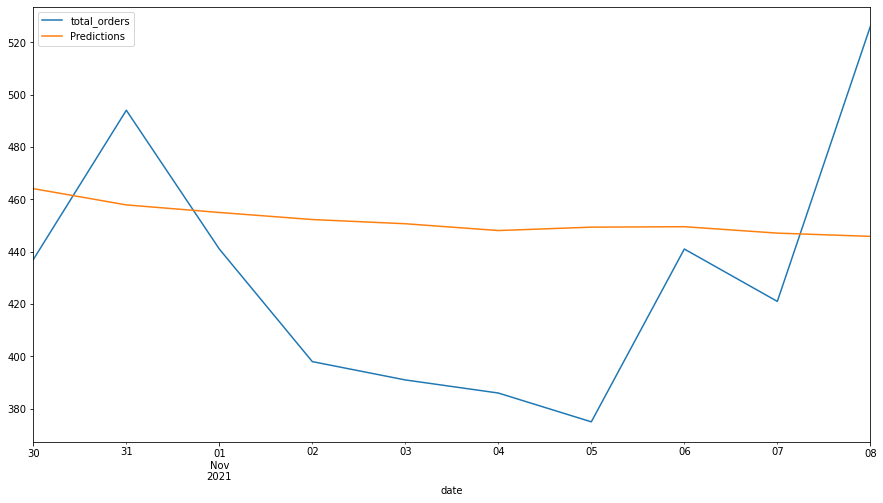

In [303]:
test.plot()

In [312]:
df2 = pd.read_csv('testing_purpose.csv',parse_dates=True)
df2['date'] = pd.to_datetime(df2['date'], format='%d/%m/%Y')
df2 = df2.set_index('date').asfreq('D')

In [313]:
test_casestudy = df2[:]

In [314]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_casestudy)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [315]:
test_predictions

[array([0.3186103], dtype=float32),
 array([0.3143018], dtype=float32),
 array([0.3123031], dtype=float32),
 array([0.31043378], dtype=float32),
 array([0.30932033], dtype=float32),
 array([0.30752313], dtype=float32),
 array([0.3084165], dtype=float32)]

In [317]:
true_predictions = scaler.inverse_transform(test_predictions)

In [318]:
predictions=[]
for i in true_predictions:
    predictions.append(i[0])

predictions

[464.0732884407043,
 457.8517830371856,
 454.96567070484156,
 452.2663713693618,
 450.6585574150085,
 448.0634016990661,
 449.3534054756164]

In [319]:
test_casestudy['Predictions'] = predictions

C:\Users\shahz\AppData\Local\Temp/ipykernel_2340/4089948935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_casestudy['Predictions'] = predictions


In [325]:
test_casestudy.drop('total_orders', inplace=True, axis=1)
test_casestudy

,Predictions
date,
2021-11-09,464.073288
2021-11-10,457.851783
2021-11-11,454.965671
2021-11-12,452.266371
2021-11-13,450.658557
2021-11-14,448.063402
2021-11-15,449.353405


In [323]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['total_orders'],test['Predictions']))
print(rmse)

50.29710917566819
